In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For ignoring warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Librairies
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer

# Charger le dataset
df = pd.read_csv("/content/Food_Nutrition_Dataset.csv")

# Aperçu rapide
df.head()


,food_name,category,calories,protein,carbs,fat,iron,vitamin_c
0,"Apple, candied",Apples,134.0,1.34,29.61,2.15,0.12,3.6
1,"Apple, raw",Apples,61.0,0.17,14.80,0.15,0.03,4.6
2,"Apple, dried",Dried fruits,243.0,0.93,65.89,0.32,1.40,3.9
3,"Crisp, apple",Cakes and pies,215.0,2.81,30.18,9.59,1.00,0.6
4,"Apple, baked",Apples,113.0,0.32,22.70,3.08,0.19,3.9


In [3]:
# Supprimer les doublons
df = df.drop_duplicates()

# Réinitialiser l'index
df = df.reset_index(drop=True)

# Vérifier les types de colonnes
print(df.dtypes)

# Exemple de formatage : transformer les noms de colonnes en minuscules et sans espaces
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]


food_name     object
category      object
calories     float64
protein      float64
carbs        float64
fat          float64
iron         float64
vitamin_c    float64
dtype: object


In [4]:
# Colonnes numériques
num_cols = df.select_dtypes(include=np.number).columns

# Colonnes catégorielles
cat_cols = df.select_dtypes(include='object').columns

# Imputation numérique (moyenne)
imputer_num = SimpleImputer(strategy='mean')
df[num_cols] = imputer_num.fit_transform(df[num_cols])

# Imputation catégorielle (valeur la plus fréquente)
imputer_cat = SimpleImputer(strategy='most_frequent')
df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])

# Vérifier s'il reste des valeurs manquantes
print(df.isnull().sum())


food_name    0
category     0
calories     0
protein      0
carbs        0
fat          0
iron         0
vitamin_c    0
dtype: int64


encodage


In [5]:
# Label Encoding pour une variable cible éventuelle (ex: category)
if 'category' in df.columns:
    le = LabelEncoder()
    df['category_encoded'] = le.fit_transform(df['category'])

# One-Hot Encoding pour toutes les variables catégorielles
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [6]:
# Standardisation (moyenne=0, écart-type=1)
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Si tu préfères Normalisation (0 à 1)
# scaler = MinMaxScaler()
# df[num_cols] = scaler.fit_transform(df[num_cols])

# Vérifier le résultat
df.head()


,calories,protein,carbs,fat,iron,vitamin_c,category_encoded,food_name_Apple cider,"food_name_Apple juice, 100%",food_name_Apple pie filling,...,category_Sweets,category_Tomato-based condiments,category_Tomatoes,"category_Tortilla, corn, other chips",category_Vegetable dishes,category_Vegetable juice,category_Vegetables and Vegetable Products,category_Vegetables on a sandwich,"category_White potatoes, baked or boiled",category_Yeast breads
0,-0.388105,-0.451720,0.201128,-0.399964,-0.667719,-0.550962,2,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,-0.646158,-0.801073,-0.536790,-0.606770,-0.749891,-0.496382,2,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-0.002793,-0.574143,2.008804,-0.589192,0.500947,-0.534588,13,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,-0.101773,-0.012789,0.229529,0.369356,0.135739,-0.714702,8,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-0.462339,-0.756284,-0.143167,-0.303799,-0.603808,-0.534588,2,False,False,False,...,False,False,False,False,False,False,False,False,False,False


importation

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Paramètres pour de jolis graphiques
sns.set(style="whitegrid")
%matplotlib inline


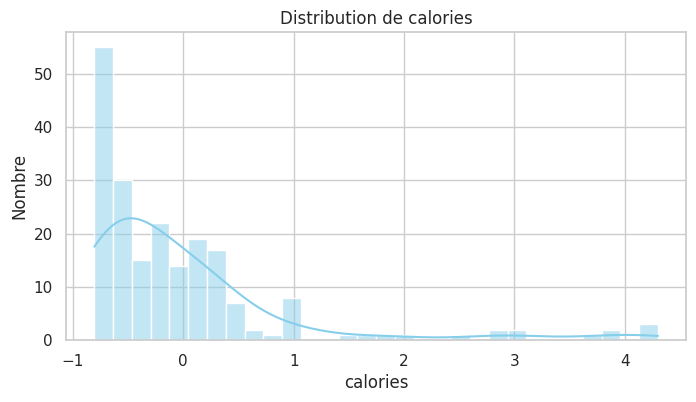

# Interprétation : La distribution de calories montre la répartition des valeurs, permettant de détecter les valeurs extrêmes ou la tendance centrale.



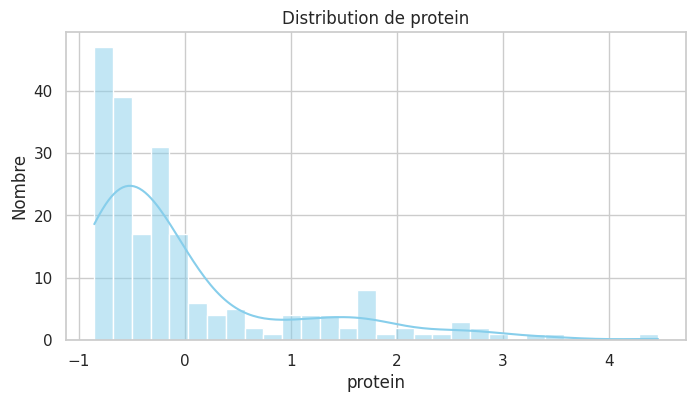

# Interprétation : La distribution de protein montre la répartition des valeurs, permettant de détecter les valeurs extrêmes ou la tendance centrale.



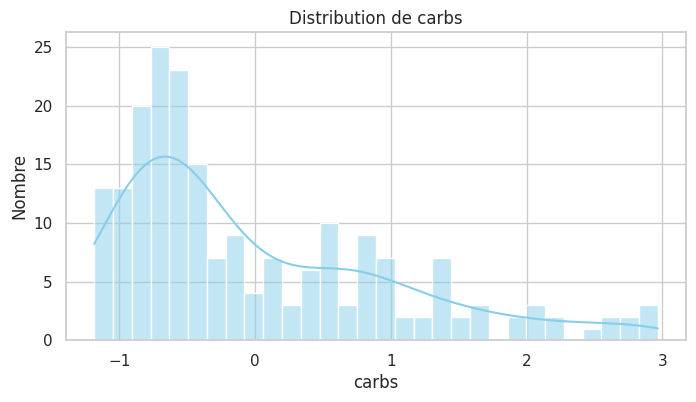

# Interprétation : La distribution de carbs montre la répartition des valeurs, permettant de détecter les valeurs extrêmes ou la tendance centrale.



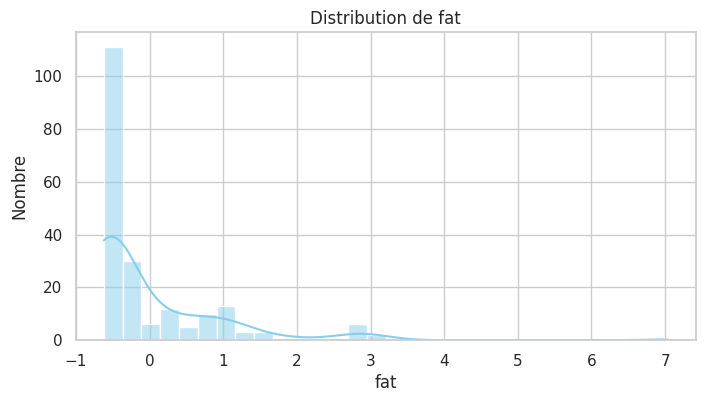

# Interprétation : La distribution de fat montre la répartition des valeurs, permettant de détecter les valeurs extrêmes ou la tendance centrale.



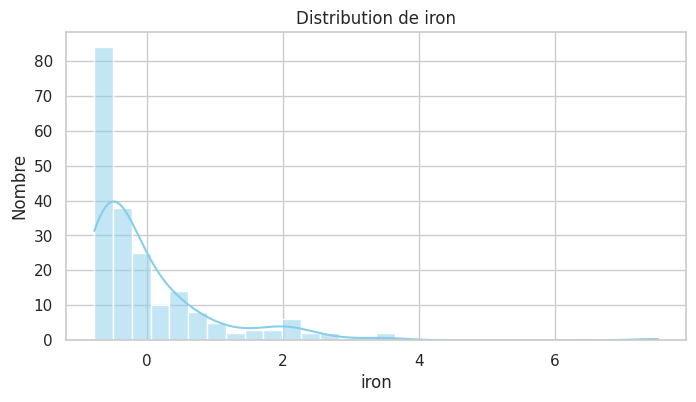

# Interprétation : La distribution de iron montre la répartition des valeurs, permettant de détecter les valeurs extrêmes ou la tendance centrale.



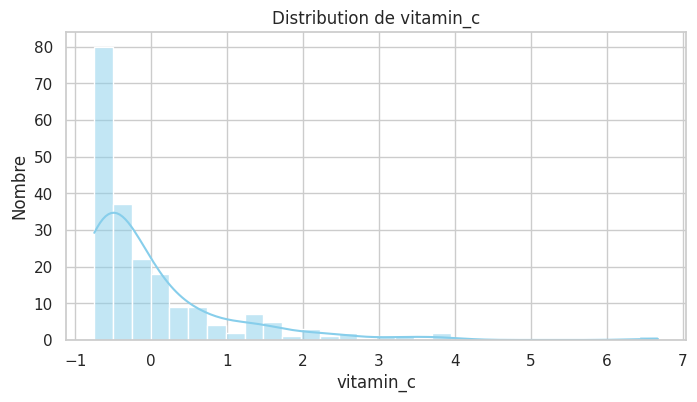

# Interprétation : La distribution de vitamin_c montre la répartition des valeurs, permettant de détecter les valeurs extrêmes ou la tendance centrale.



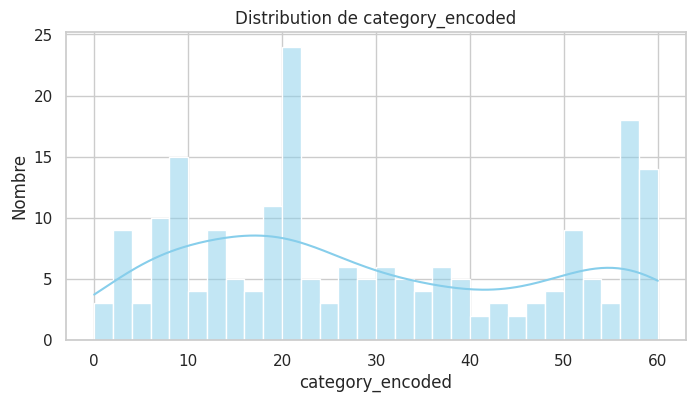

# Interprétation : La distribution de category_encoded montre la répartition des valeurs, permettant de détecter les valeurs extrêmes ou la tendance centrale.



In [8]:
# Histogrammes pour toutes les colonnes numériques
num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Nombre')
    plt.show()

    # Exemple d'interprétation
    print(f"# Interprétation : La distribution de {col} montre la répartition des valeurs, "
          "permettant de détecter les valeurs extrêmes ou la tendance centrale.\n")


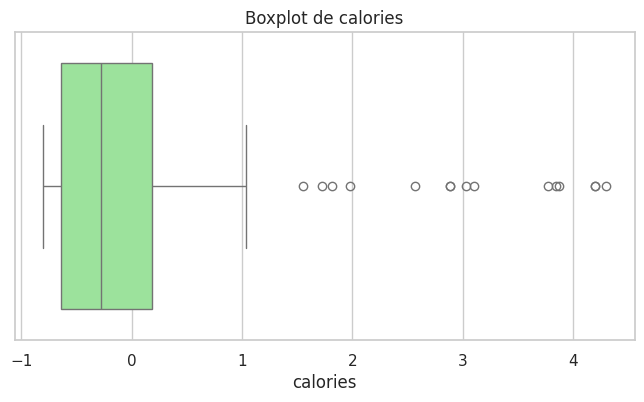

# Interprétation : Le boxplot de calories permet d'observer les valeurs extrêmes et la dispersion autour de la médiane.



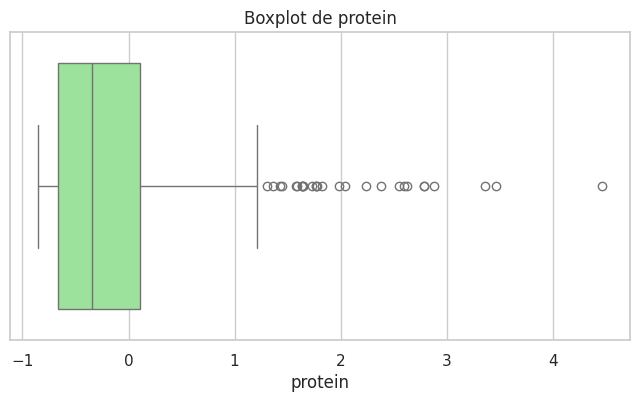

# Interprétation : Le boxplot de protein permet d'observer les valeurs extrêmes et la dispersion autour de la médiane.



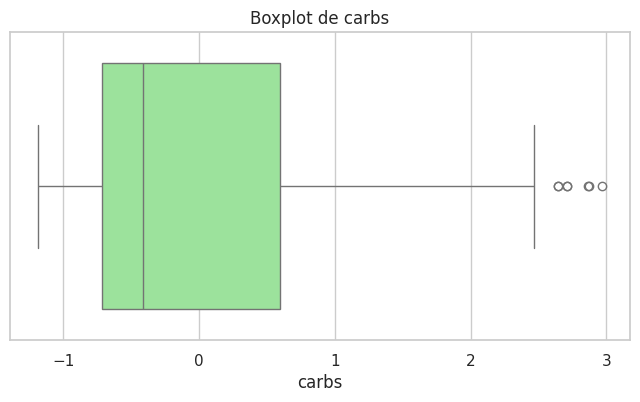

# Interprétation : Le boxplot de carbs permet d'observer les valeurs extrêmes et la dispersion autour de la médiane.



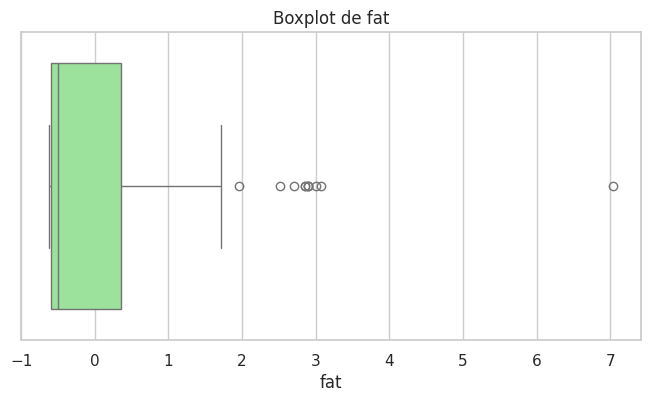

# Interprétation : Le boxplot de fat permet d'observer les valeurs extrêmes et la dispersion autour de la médiane.



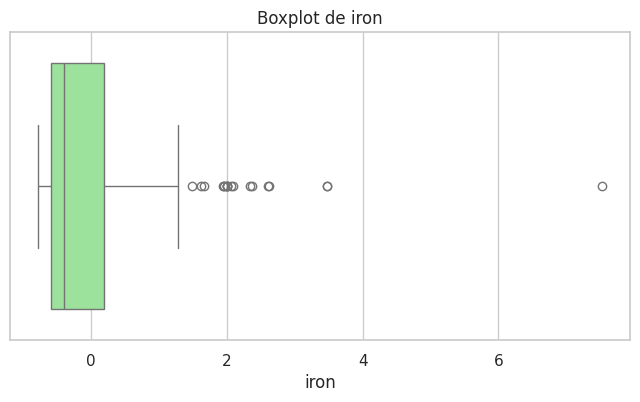

# Interprétation : Le boxplot de iron permet d'observer les valeurs extrêmes et la dispersion autour de la médiane.



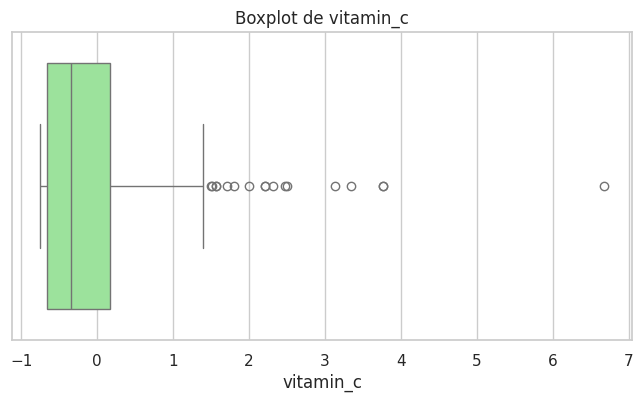

# Interprétation : Le boxplot de vitamin_c permet d'observer les valeurs extrêmes et la dispersion autour de la médiane.



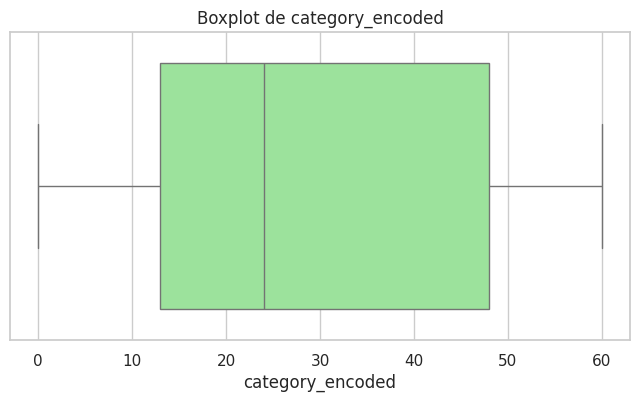

# Interprétation : Le boxplot de category_encoded permet d'observer les valeurs extrêmes et la dispersion autour de la médiane.



In [9]:
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.show()

    # Exemple d'interprétation
    print(f"# Interprétation : Le boxplot de {col} permet d'observer les valeurs extrêmes "
          "et la dispersion autour de la médiane.\n")


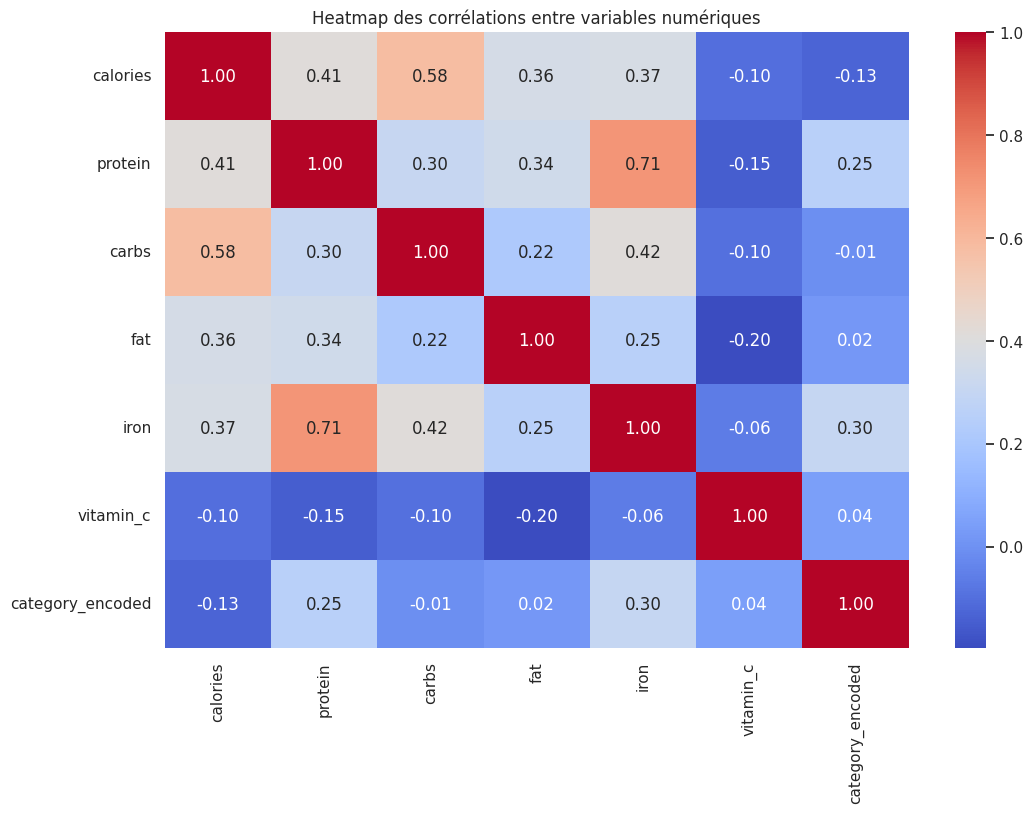

# Interprétation : La heatmap montre quelles variables sont fortement corrélées. Par exemple, calories et graisses totales peuvent être fortement liées.



In [10]:
# Matrice de corrélation
corr_matrix = df[num_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Heatmap des corrélations entre variables numériques")
plt.show()

# Interprétation
print("# Interprétation : La heatmap montre quelles variables sont fortement corrélées. "
      "Par exemple, calories et graisses totales peuvent être fortement liées.\n")


Feature Engineering : Création de nouvelles variables

In [14]:
# Création de calories par 100g
if 'calories' in df.columns and 'serving_size' in df.columns:
    df['calories_per_100g'] = df['calories'] / df['serving_size'] * 100

# Création du ratio protéines / glucides
if 'protein' in df.columns and 'carbohydrates' in df.columns:
    df['protein_carb_ratio'] = df['protein'] / (df['carbohydrates'] + 1e-5)  # éviter division par 0

# Vérification
cols_to_check = []
if 'calories_per_100g' in df.columns:
    cols_to_check.append('calories_per_100g')
if 'protein_carb_ratio' in df.columns:
    cols_to_check.append('protein_carb_ratio')

df[cols_to_check].head()


""
0
1
2
3
4


methode par regression

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


In [16]:
# Exemple : prédire 'calories'
target = 'calories'
features = df.drop(columns=[target])

X = features
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Tester plusieurs modèles avec Cross-Validation

In [17]:
models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(random_state=42),
    "SVR": SVR()
}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    print(f"{name} R² CV: {scores.mean():.4f} ± {scores.std():.4f}")


LinearRegression R² CV: 0.6738 ± 0.1404
RandomForest R² CV: 0.5937 ± 0.1367
SVR R² CV: 0.1112 ± 0.1633


Optimisation des hyperparamètres pour RandomForestRegressor

In [19]:
param_grid_rf = {
    'n_estimators': [100, 200],      # moins de valeurs
    'max_depth': [None, 10],         # moins de profondeurs
    'min_samples_split': [2, 5]      # moins de splits
}


In [20]:
from sklearn.model_selection import RandomizedSearchCV

random_rf = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_grid_rf,
    n_iter=10,   # seulement 10 combinaisons aléatoires
    cv=3,        # CV réduit pour accélérer
    scoring='r2',
    random_state=42
)

random_rf.fit(X_train, y_train)
print("Meilleurs paramètres RandomForest:", random_rf.best_params_)
print("Meilleur R² CV:", random_rf.best_score_)


Meilleurs paramètres RandomForest: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 10}
Meilleur R² CV: 0.4874474644799023


In [21]:
X_train_small = X_train.sample(frac=0.2, random_state=42)
y_train_small = y_train.loc[X_train_small.index]

random_rf.fit(X_train_small, y_train_small)


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_depth': [None, 10],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200]},
                   random_state=42, scoring='r2')

Évaluation finale sur le test set

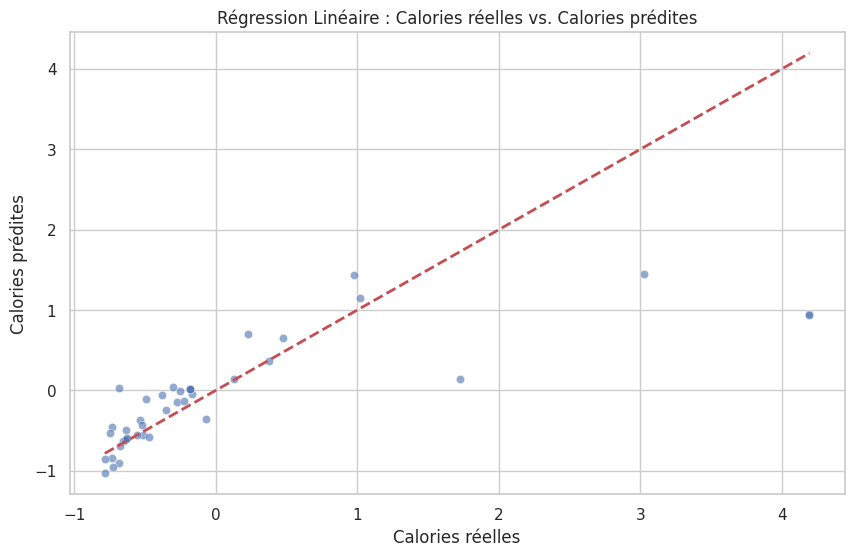

Scatter plot des valeurs réelles vs. prédites pour la Régression Linéaire affiché.


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supposons que ton modèle Linear Regression a été entraîné
from sklearn.linear_model import LinearRegression

# Modèle Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Prédictions sur le test set
y_pred_lr = lr_model.predict(X_test)

# Scatter plot : valeurs réelles vs. valeurs prédites
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # ligne y=x
plt.xlabel("Calories réelles")
plt.ylabel("Calories prédites")
plt.title("Régression Linéaire : Calories réelles vs. Calories prédites")
plt.grid(True)
plt.show()

print("Scatter plot des valeurs réelles vs. prédites pour la Régression Linéaire affiché.")


Raisonnement : La première étape consiste à importer la classe PolynomialFeatures et à créer des caractéristiques polynomiales à partir des variables explicatives existantes (X_train et X_test) de notre dataset nutritionnel. Cela permettra de transformer l’espace des features pour la régression polynomiale. Ensuite, un modèle de Régression Linéaire sera entraîné sur ces nouvelles caractéristiques, ses performances seront évaluées, et un graphique comparant les calories réelles aux calories prédites sera généré pour visualiser la qualité des prédictions.

In [24]:
from sklearn.preprocessing import PolynomialFeatures

# Création de caractéristiques polynomiales (degré 2)
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# Transformation des données d'entraînement et de test
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

print("Caractéristiques polynomiales créées pour les sets d'entraînement et de test.")


Caractéristiques polynomiales créées pour les sets d'entraînement et de test.


In [25]:
from sklearn.linear_model import LinearRegression

# Initialisation et entraînement du modèle de Régression Linéaire sur les features polynomiales
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

print("Modèle de Régression Linéaire entraîné sur les caractéristiques polynomiales.")


Modèle de Régression Linéaire entraîné sur les caractéristiques polynomiales.


In [26]:
# Prédictions sur le set de test transformé avec les caractéristiques polynomiales
y_pred_poly = model_poly.predict(X_test_poly)

print("Prédictions sur le set de test polynomiales effectuées.")


Prédictions sur le set de test polynomiales effectuées.


In [27]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Évaluation du modèle polynomial
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Régression Polynomiale - R² : {r2_poly:.2f}")
print(f"Régression Polynomiale - MSE : {mse_poly:.2f}")
print(f"Régression Polynomiale - RMSE : {rmse_poly:.2f}")


Régression Polynomiale - R² : 0.47
Régression Polynomiale - MSE : 0.76
Régression Polynomiale - RMSE : 0.87


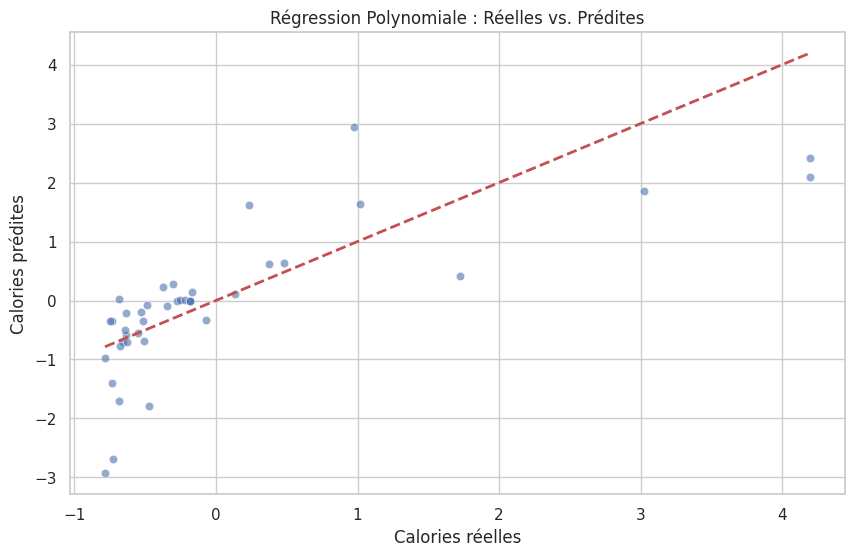

Scatter plot des calories réelles vs. prédites pour la Régression Polynomiale affiché.


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot : valeurs réelles vs valeurs prédites pour la régression polynomiale
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_poly, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # ligne y=x
plt.xlabel("Calories réelles")
plt.ylabel("Calories prédites")
plt.title("Régression Polynomiale : Réelles vs. Prédites")
plt.grid(True)
plt.show()

print("Scatter plot des calories réelles vs. prédites pour la Régression Polynomiale affiché.")


In [29]:
from sklearn.tree import DecisionTreeRegressor

# Juste pour vérifier que l'importation fonctionne
print("DecisionTreeRegressor importé avec succès.")


DecisionTreeRegressor importé avec succès.


In [30]:
from sklearn.tree import DecisionTreeRegressor

# Initialisation et entraînement du modèle
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)

print("Modèle Decision Tree Regressor initialisé et entraîné.")


Modèle Decision Tree Regressor initialisé et entraîné.


In [31]:
# Prédictions sur le set de test avec le Decision Tree Regressor
y_pred_dt = model_dt.predict(X_test)

print("Prédictions sur le set de test effectuées pour le Decision Tree Regressor.")


Prédictions sur le set de test effectuées pour le Decision Tree Regressor.


In [32]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Évaluation du modèle Decision Tree Regressor
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Regression - R² : {r2_dt:.2f}")
print(f"Decision Tree Regression - MSE : {mse_dt:.2f}")
print(f"Decision Tree Regression - RMSE : {rmse_dt:.2f}")


Decision Tree Regression - R² : 0.34
Decision Tree Regression - MSE : 0.95
Decision Tree Regression - RMSE : 0.97


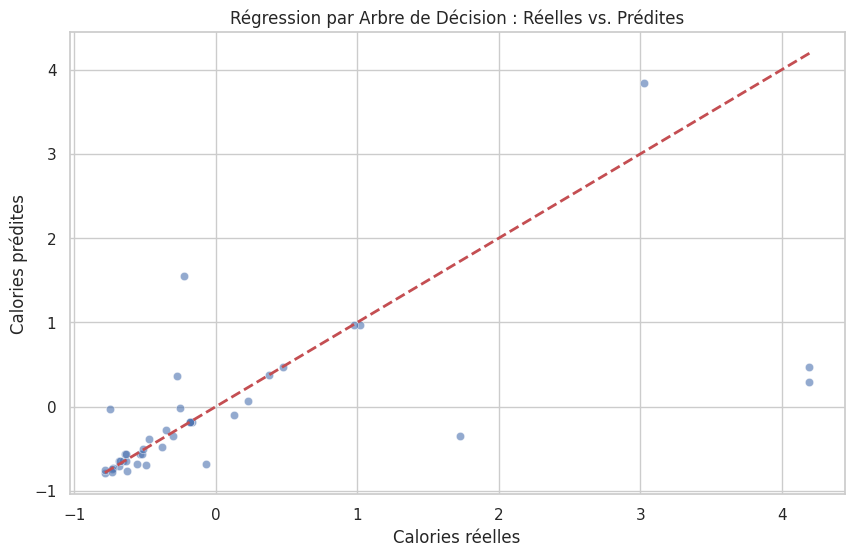

Scatter plot des calories réelles vs. prédites pour le Decision Tree Regressor affiché.


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot : valeurs réelles vs valeurs prédites pour le Decision Tree Regressor
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_dt, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # ligne y=x
plt.xlabel("Calories réelles")
plt.ylabel("Calories prédites")
plt.title("Régression par Arbre de Décision : Réelles vs. Prédites")
plt.grid(True)
plt.show()

print("Scatter plot des calories réelles vs. prédites pour le Decision Tree Regressor affiché.")


In [34]:
from sklearn.ensemble import RandomForestRegressor

# Vérification de l'importation
print("RandomForestRegressor importé avec succès.")


RandomForestRegressor importé avec succès.


In [35]:
from sklearn.ensemble import RandomForestRegressor

# Initialisation et entraînement du modèle
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

print("Modèle Random Forest Regressor initialisé et entraîné.")


Modèle Random Forest Regressor initialisé et entraîné.


In [37]:
from sklearn.preprocessing import StandardScaler

# Standardisation des features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features standardisées pour les sets d'entraînement et de test.")


Features standardisées pour les sets d'entraînement et de test.


In [38]:
from sklearn.svm import SVR

# Initialisation et entraînement du modèle SVR
model_svr = SVR(kernel='rbf')
model_svr.fit(X_train_scaled, y_train)

print("Modèle SVR initialisé et entraîné avec le kernel 'rbf'.")


Modèle SVR initialisé et entraîné avec le kernel 'rbf'.


In [39]:
# Prédictions sur le set de test standardisé avec le modèle SVR
y_pred_svr = model_svr.predict(X_test_scaled)

print("Prédictions sur le set de test standardisé effectuées pour le modèle SVR.")


Prédictions sur le set de test standardisé effectuées pour le modèle SVR.


In [40]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Évaluation du modèle SVR
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"SVR Regression - R² : {r2_svr:.2f}")
print(f"SVR Regression - MSE : {mse_svr:.2f}")
print(f"SVR Regression - RMSE : {rmse_svr:.2f}")


SVR Regression - R² : 0.33
SVR Regression - MSE : 0.97
SVR Regression - RMSE : 0.98


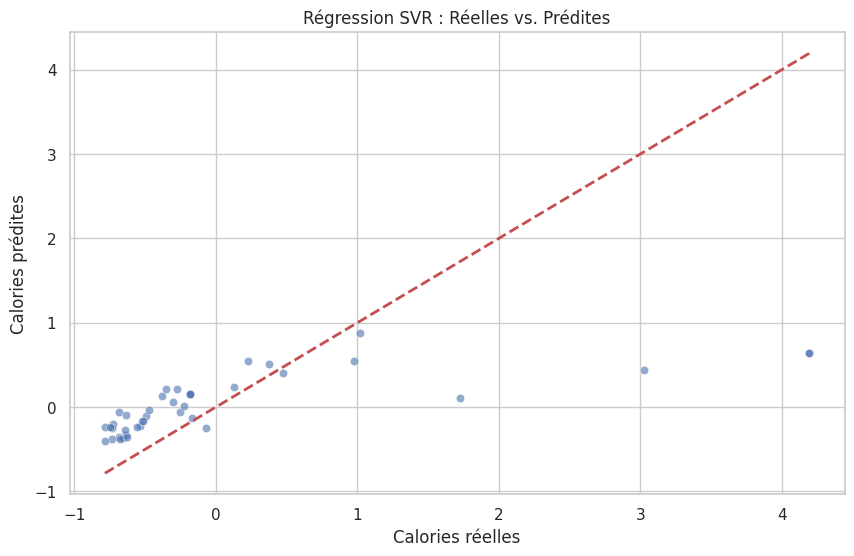

Scatter plot des calories réelles vs. prédites pour le modèle SVR affiché.


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot : valeurs réelles vs valeurs prédites pour le modèle SVR
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_svr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # ligne y=x
plt.xlabel("Calories réelles")
plt.ylabel("Calories prédites")
plt.title("Régression SVR : Réelles vs. Prédites")
plt.grid(True)
plt.show()

print("Scatter plot des calories réelles vs. prédites pour le modèle SVR affiché.")


In [48]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Polynomial Regression
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Decision Tree Regressor
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Random Forest Regressor
mse_rf = mean_squared_error(y_test, y_pred_rf) # y_pred_rf is now defined
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# SVR
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Dictionnaire des performances
results_df_dict = {
    'Modèle': ['Régression Linéaire',
               'Régression Polynomiale',
               'Régression par Arbre de Décision',
               'Régression par Forêt Aléatoire',
               'SVR'],
    'R-squared': [r2_lr, r2_poly, r2_dt, r2_rf, r2_svr],
    'MSE': [mse_lr, mse_poly, mse_dt, mse_rf, mse_svr],
    'RMSE': [rmse_lr, rmse_poly, rmse_dt, rmse_rf, rmse_svr]
}

import pandas as pd
results_df = pd.DataFrame(results_df_dict)
display(results_df)

,Modèle,R-squared,MSE,RMSE
0,Régression Linéaire,0.520510,0.687457,0.829131
1,Régression Polynomiale,0.468031,0.762698,0.873326
2,Régression par Arbre de Décision,0.339819,0.946519,0.972892
3,Régression par Forêt Aléatoire,0.339173,0.947445,0.973368
4,SVR,0.325361,0.967248,0.983487


In [46]:
# Prédictions sur le set de test avec le Random Forest Regressor
y_pred_rf = model_rf.predict(X_test)

print("Prédictions sur le set de test effectuées pour le Random Forest Regressor.")

Prédictions sur le set de test effectuées pour le Random Forest Regressor.


In [47]:
import pandas as pd

# Conversion du dictionnaire en DataFrame
results_df = pd.DataFrame(results_df_dict)

print("Métriques de performance converties en DataFrame.")
results_df


NameError: name 'results_df_dict' is not defined

In [49]:
print("Comparaison des performances des modèles de régression :")
print(results_df)

Comparaison des performances des modèles de régression :
                             Modèle  R-squared       MSE      RMSE
0               Régression Linéaire   0.520510  0.687457  0.829131
1            Régression Polynomiale   0.468031  0.762698  0.873326
2  Régression par Arbre de Décision   0.339819  0.946519  0.972892
3    Régression par Forêt Aléatoire   0.339173  0.947445  0.973368
4                               SVR   0.325361  0.967248  0.983487


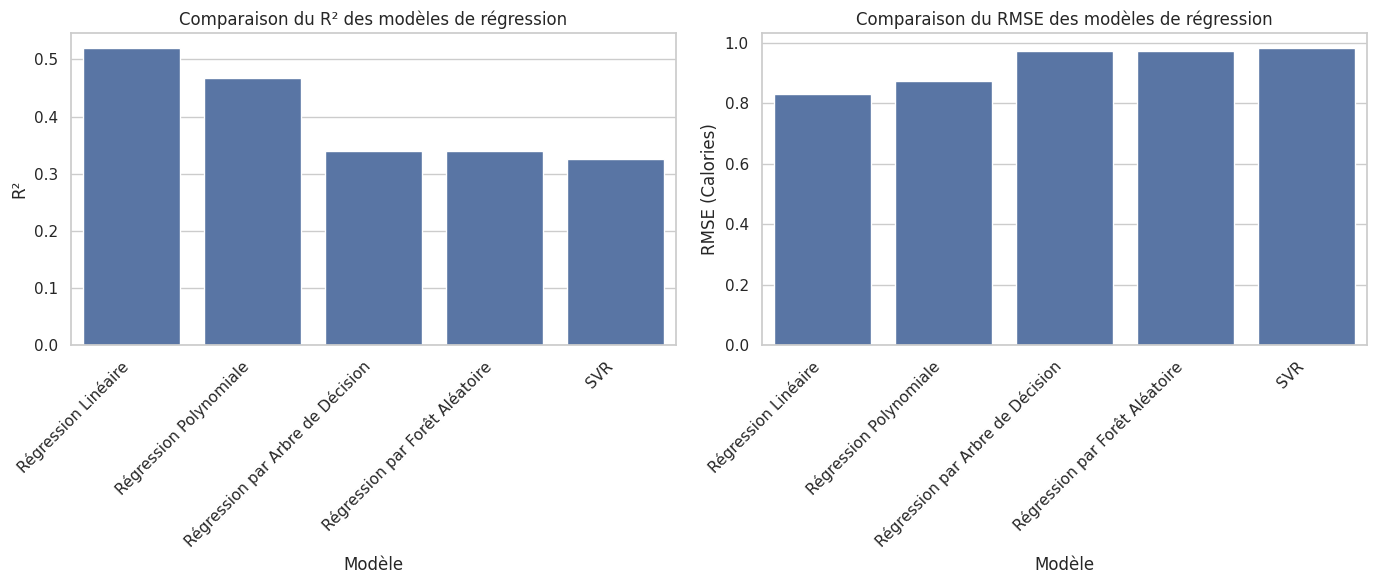

Graphiques en barres comparant R² et RMSE pour chaque modèle affichés.


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Subplot 1: Comparaison du R²
plt.subplot(1, 2, 1)
sns.barplot(x='Modèle', y='R-squared', data=results_df)
plt.title('Comparaison du R² des modèles de régression')
plt.ylabel('R²')
plt.xlabel('Modèle')
plt.xticks(rotation=45, ha='right')

# Subplot 2: Comparaison du RMSE
plt.subplot(1, 2, 2)
sns.barplot(x='Modèle', y='RMSE', data=results_df)
plt.title('Comparaison du RMSE des modèles de régression')
plt.ylabel('RMSE (Calories)')
plt.xlabel('Modèle')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

print("Graphiques en barres comparant R² et RMSE pour chaque modèle affichés.")
